# Necessary Comment : jupyter notebook

## Necessary Lighbary



In [2]:
import sqlite3
import pandas as pd
import talib
import mplfinance as mpf
import numpy as np

In [3]:
import matplotlib.pyplot as plt
# import seaborn as sns

## Database Connection

In [7]:
# connection = sqlite3.connect(r"cripto.db")
connection = sqlite3.connect(r"../database/big_data.db")
cur = connection.cursor()
database_data = cur.execute("select * from asset order by CloseTime").fetchall()

## Dataframe

In [8]:
df = pd.DataFrame(database_data)
# df = df.head(10000)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1543657,BTCBUSD,19998.23,20002.69,19995.19,19998.21,9.474930,-0.000100008850785477,1.661659e+12,189483.099107,441.0,6.187260,1661658480
1,1543281,BTCBUSD,19997.02,19998.00,19997.00,19997.00,2.829590,-0.000100014902222614,1.661636e+12,56583.426669,173.0,0.973320,1661635920
2,215362,BTCBUSD,9997.97,9998.65,9997.96,9997.96,0.219472,-0.00010002030412392,1.581828e+12,2194.416861,5.0,0.000000,1581828360
3,215635,BTCBUSD,9995.59,9995.60,9995.58,9995.58,0.329002,-0.000100044119458864,1.581845e+12,3288.567211,4.0,0.000000,1581844740
4,1544689,BTCBUSD,19987.76,19998.62,19985.14,19987.74,25.911260,-0.000100061237461319,1.661720e+12,518027.903052,642.0,17.762630,1661720400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706333,1396320,BTCBUSD,30036.82,30036.85,30026.53,30036.85,1.743990,9.98774171128497e-05,1.652818e+12,52377.270472,94.0,0.921370,1652818260
1706334,215640,BTCBUSD,10007.99,10008.00,10007.99,10008.00,0.020623,9.99201637913135e-05,1.581845e+12,206.394904,3.0,0.020623,1581845040
1706335,215639,BTCBUSD,10005.99,10006.00,10005.99,10006.00,0.008695,9.99401358608021e-05,1.581845e+12,87.002120,2.0,0.008695,1581844980
1706336,1271101,BTCBUSD,40020.02,40023.65,40020.02,40020.06,4.136800,9.99499750396754e-05,1.645305e+12,165568.528356,92.0,1.654020,1645305120


## Name Columns

In [9]:
df.columns = ['Id', 'Symbol', 'Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime','VolumeBUSD', 'Trades', 'BuyQuoteVolume', 'Time']
# df = df.iloc[:, 2:12]
df


,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,CloseTime,VolumeBUSD,Trades,BuyQuoteVolume,Time
0,1543657,BTCBUSD,19998.23,20002.69,19995.19,19998.21,9.474930,-0.000100008850785477,1.661659e+12,189483.099107,441.0,6.187260,1661658480
1,1543281,BTCBUSD,19997.02,19998.00,19997.00,19997.00,2.829590,-0.000100014902222614,1.661636e+12,56583.426669,173.0,0.973320,1661635920
2,215362,BTCBUSD,9997.97,9998.65,9997.96,9997.96,0.219472,-0.00010002030412392,1.581828e+12,2194.416861,5.0,0.000000,1581828360
3,215635,BTCBUSD,9995.59,9995.60,9995.58,9995.58,0.329002,-0.000100044119458864,1.581845e+12,3288.567211,4.0,0.000000,1581844740
4,1544689,BTCBUSD,19987.76,19998.62,19985.14,19987.74,25.911260,-0.000100061237461319,1.661720e+12,518027.903052,642.0,17.762630,1661720400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706333,1396320,BTCBUSD,30036.82,30036.85,30026.53,30036.85,1.743990,9.98774171128497e-05,1.652818e+12,52377.270472,94.0,0.921370,1652818260
1706334,215640,BTCBUSD,10007.99,10008.00,10007.99,10008.00,0.020623,9.99201637913135e-05,1.581845e+12,206.394904,3.0,0.020623,1581845040
1706335,215639,BTCBUSD,10005.99,10006.00,10005.99,10006.00,0.008695,9.99401358608021e-05,1.581845e+12,87.002120,2.0,0.008695,1581844980
1706336,1271101,BTCBUSD,40020.02,40023.65,40020.02,40020.06,4.136800,9.99499750396754e-05,1.645305e+12,165568.528356,92.0,1.654020,1645305120


# Make a Candle plot

In [10]:
df = df.set_index('CloseTime')
df.index = pd.to_datetime(df.index, unit='ms')
# df = df.tail(100)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,VolumeBUSD,Trades,BuyQuoteVolume,Time
CloseTime,,,,,,,,,,,,
2022-08-28 03:48:59.999000064,1543657,BTCBUSD,19998.23,20002.69,19995.19,19998.21,9.474930,-0.000100008850785477,189483.099107,441.0,6.187260,1661658480
2022-08-27 21:32:59.999000064,1543281,BTCBUSD,19997.02,19998.00,19997.00,19997.00,2.829590,-0.000100014902222614,56583.426669,173.0,0.973320,1661635920
2020-02-16 04:46:59.999000064,215362,BTCBUSD,9997.97,9998.65,9997.96,9997.96,0.219472,-0.00010002030412392,2194.416861,5.0,0.000000,1581828360
2020-02-16 09:19:59.999000064,215635,BTCBUSD,9995.59,9995.60,9995.58,9995.58,0.329002,-0.000100044119458864,3288.567211,4.0,0.000000,1581844740
2022-08-28 21:00:59.999000064,1544689,BTCBUSD,19987.76,19998.62,19985.14,19987.74,25.911260,-0.000100061237461319,518027.903052,642.0,17.762630,1661720400
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-17 20:11:59.999000064,1396320,BTCBUSD,30036.82,30036.85,30026.53,30036.85,1.743990,9.98774171128497e-05,52377.270472,94.0,0.921370,1652818260
2020-02-16 09:24:59.999000064,215640,BTCBUSD,10007.99,10008.00,10007.99,10008.00,0.020623,9.99201637913135e-05,206.394904,3.0,0.020623,1581845040
2020-02-16 09:23:59.999000064,215639,BTCBUSD,10005.99,10006.00,10005.99,10006.00,0.008695,9.99401358608021e-05,87.002120,2.0,0.008695,1581844980


# Make a Custom Pattern

In [11]:
# # TODO: ALL all 100 and -100 to the X asis
# # Find Candle Pattern
ENGULFING = talib.CDLENGULFING(df['Open'], df['High'], df['Low'],
                                         df['Close'])
ENGULFING
ENGULFING[ENGULFING != 0]

# bullish_engulfing = (ENGULFING.replace([-100, 0], np.nan)/100) *(df.Low-2)
# bearsh_engulfing = (-ENGULFING.replace([100, 0], np.nan)/100) *(df.High *1.0001)

# addplot = [mpf.make_addplot(bullish_engulfing, type='scatter', color='g', marker = "^"), mpf.make_addplot(bearsh_engulfing, type='scatter', color='r', marker = "v")]
# mpf.plot(df, addplot = addplot,title=f"Engulfing Signal", type="candle",style="yahoo")

Series([], dtype: int32)

In [12]:
# dir(talib)

In [13]:
"""
means you are dropping duplicket column.
https://stackoverflow.com/questions/35084071/concat-dataframe-reindexing-only-valid-with-uniquely-valued-index-objects

"""
# df = df.head(100)
df = df.reset_index(drop=True)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,VolumeBUSD,Trades,BuyQuoteVolume,Time
0,1543657,BTCBUSD,19998.23,20002.69,19995.19,19998.21,9.474930,-0.000100008850785477,189483.099107,441.0,6.187260,1661658480
1,1543281,BTCBUSD,19997.02,19998.00,19997.00,19997.00,2.829590,-0.000100014902222614,56583.426669,173.0,0.973320,1661635920
2,215362,BTCBUSD,9997.97,9998.65,9997.96,9997.96,0.219472,-0.00010002030412392,2194.416861,5.0,0.000000,1581828360
3,215635,BTCBUSD,9995.59,9995.60,9995.58,9995.58,0.329002,-0.000100044119458864,3288.567211,4.0,0.000000,1581844740
4,1544689,BTCBUSD,19987.76,19998.62,19985.14,19987.74,25.911260,-0.000100061237461319,518027.903052,642.0,17.762630,1661720400
...,...,...,...,...,...,...,...,...,...,...,...,...
1706333,1396320,BTCBUSD,30036.82,30036.85,30026.53,30036.85,1.743990,9.98774171128497e-05,52377.270472,94.0,0.921370,1652818260
1706334,215640,BTCBUSD,10007.99,10008.00,10007.99,10008.00,0.020623,9.99201637913135e-05,206.394904,3.0,0.020623,1581845040
1706335,215639,BTCBUSD,10005.99,10006.00,10005.99,10006.00,0.008695,9.99401358608021e-05,87.002120,2.0,0.008695,1581844980
1706336,1271101,BTCBUSD,40020.02,40023.65,40020.02,40020.06,4.136800,9.99499750396754e-05,165568.528356,92.0,1.654020,1645305120


In [14]:
df['rsi'] = talib.RSI(df['Close'], timeperiod=5)
# print(data['rsi'].to_string())

# Generate signals
df['rsisignal'] = 0
df.loc[df['rsi'] > 70, 'rsisignal'] = -100
df.loc[df['rsi'] < 30, 'rsisignal'] = 100
# df['rsisignal'] = df['rsisignal'].fillna(0)

print(df['rsisignal'].to_string())


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [15]:
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
print(results)
print(cols)

[0          0
1          0
2          0
3          0
4          0
          ..
1706333    0
1706334    0
1706335    0
1706336    0
1706337    0
Length: 1706338, dtype: int32, 0          0
1          0
2          0
3          0
4          0
          ..
1706333    0
1706334    0
1706335    0
1706336    0
1706337    0
Length: 1706338, dtype: int32, 0          0
1          0
2          0
3          0
4          0
          ..
1706333    0
1706334    0
1706335    0
1706336    0
1706337    0
Length: 1706338, dtype: int32, 0          0
1          0
2          0
3          0
4          0
          ..
1706333    0
1706334    0
1706335    0
1706336    0
1706337    0
Length: 1706338, dtype: int32, 0          0
1          0
2          0
3          0
4          0
          ..
1706333    0
1706334    0
1706335    0
1706336    0
1706337    0
Length: 1706338, dtype: int32, 0          0
1          0
2          0
3          0
4          0
          ..
1706333    0
1706334    0
1706335    0
1706336    0

In [16]:
patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns['rsi'] = df['rsisignal']
patterns["Sum"] = patterns.sum(axis=1)
patterns

,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,...,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,rsi,Sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706333,0,0,0,0,0,0,0,0,0,0,...,0,100,0,0,-100,0,0,0,0,400
1706334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,200
1706335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,200
1706336,0,0,0,0,0,0,0,0,0,100,...,0,0,0,0,100,0,0,0,0,500


# Make Dataframe From Binance Data

## Get Result and All the candlesticks from Ta-Lib

## Frame all candle and add sum of the candle result

## Saferate Numeracdata from dataframe

In [24]:
df = df.drop(['Symbol', 'Id', 'Time'], axis=1)

In [25]:
# df = df.iloc[:,0:10]
# x

## Combine two Dataframe

In [26]:
df = df.astype(float)


In [27]:
df = df.add(patterns, fill_value=0)
df

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,...,Close,High,Low,Open,Sum,Trades,VolumeBTC,VolumeBUSD,rsi,rsisignal
0,19.68150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16765.73,16770.81,16764.48,16765.75,0.0,1880.0,40.99442,6.873578e+05,0.000000,0.0
1,7.32206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16754.11,16755.60,16753.41,16754.13,0.0,420.0,12.70363,2.128430e+05,0.000000,0.0
2,40.39891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16820.67,16825.45,16813.12,16820.70,0.0,2180.0,86.91679,1.461859e+06,0.000000,0.0
3,32.39458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16781.01,16784.23,16779.70,16781.05,0.0,1768.0,58.39194,9.799370e+05,0.000000,0.0
4,55.70302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16746.40,16747.51,16741.80,16746.45,0.0,2613.0,107.27098,1.796215e+06,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1082.16825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16767.82,16861.42,16700.80,16702.23,100.0,23046.0,2038.68257,3.423084e+07,57.477622,0.0
1436,369.70206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16702.97,16710.00,16637.46,16637.46,200.0,9072.0,734.60299,1.225125e+07,53.444436,0.0
1437,23.29745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16754.24,16757.03,16750.89,16754.23,400.0,1249.0,39.97731,6.697752e+05,56.463461,0.0
1438,34.32521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16618.15,16621.19,16612.77,16618.14,900.0,1806.0,84.67192,1.406916e+06,46.465743,0.0


## Make a plot to see the sum

0          0
1          0
2          0
3          0
4          0
        ... 
1435     200
1436     400
1437     800
1438    1800
1439    1800
Length: 1440, dtype: int64


<AxesSubplot: >

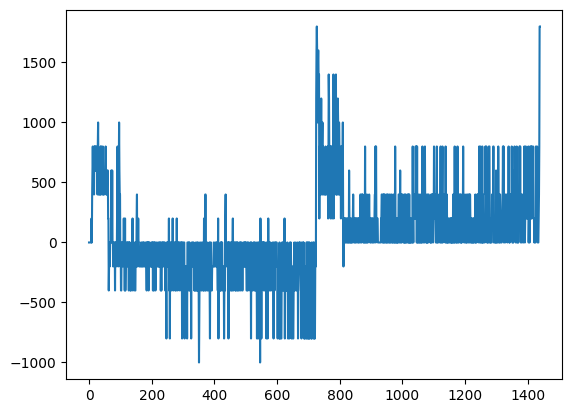

In [28]:
all_pats = patterns.sum(axis=1)
print(all_pats)
all_pats.plot()

In [29]:
# sns.pairplot(df.head(10000))

## X paramiter for feeding Model

In [30]:
X = df.drop(['Sum','rsi','rsisignal'], axis=1)
X

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,...,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,Change,Close,High,Low,Open,Trades,VolumeBTC,VolumeBUSD
0,19.68150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000119,16765.73,16770.81,16764.48,16765.75,1880.0,40.99442,6.873578e+05
1,7.32206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000119,16754.11,16755.60,16753.41,16754.13,420.0,12.70363,2.128430e+05
2,40.39891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000178,16820.67,16825.45,16813.12,16820.70,2180.0,86.91679,1.461859e+06
3,32.39458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000238,16781.01,16784.23,16779.70,16781.05,1768.0,58.39194,9.799370e+05
4,55.70302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000299,16746.40,16747.51,16741.80,16746.45,2613.0,107.27098,1.796215e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1082.16825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.392702,16767.82,16861.42,16700.80,16702.23,23046.0,2038.68257,3.423084e+07
1436,369.70206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.393750,16702.97,16710.00,16637.46,16637.46,9072.0,734.60299,1.225125e+07
1437,23.29745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000060,16754.24,16757.03,16750.89,16754.23,1249.0,39.97731,6.697752e+05
1438,34.32521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000060,16618.15,16621.19,16612.77,16618.14,1806.0,84.67192,1.406916e+06


## Y paramiter for feedind Model

In [31]:
y = df['Sum']
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
1435    100.0
1436    200.0
1437    400.0
1438    900.0
1439    900.0
Name: Sum, Length: 1440, dtype: float64

## Model for AI Research

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier()
# model=RandomForestClassifier()
model

DecisionTreeClassifier()

## Fit X and y data to model

In [33]:
# model.fit(X, y)

## Calculating the Accuracy
### Normally I take very small data for that but in real application we have to take very big dataset

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.1)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions[:5])
print(len(predictions))
print(y_test[:5])
accuracy_score(y_test, predictions)

[ 200. -100.    0. -100.    0.]
144
1269    200.0
437    -100.0
260       0.0
177    -100.0
1380      0.0
Name: Sum, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_4252\1322589592.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(y_test[:5])


0.8819444444444444

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.1)

## Export Train model

## Directally Grab Fidable data from internet but it have to be superviged test data from database

## Make Prediction With Train Model

In [36]:
from dataframe import GetDataframe
symbol = "BTCBUSD"

df = GetDataframe().get_minute_data(symbol, 1, 5)
df = df.iloc[:,0:10]
df.astype(float)
# df = df.drop(columns=['symbol','VolumeBUSD', 'CloseTime'])
# df = df.iloc[0]
# print(df)
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
# print(results)
# print(cols)

patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns["Sum"] = patterns.sum(axis=1)
patterns
df = df.add(patterns, fill_value=0)
df = df.drop(['CloseTime', 'Sum'], axis=1)
df = df.iloc[-2]
# print(df)
print(model.predict([df]))

[0.]


C:\Users\user\PycharmProjects\TradingAiDevlopment\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [37]:
# print(df)

# model = joblib.load("btcbusd_trand_predictor.joblib")
# predictions = model.predict([df])
# predictions

## Use Tensorflow

In [38]:
X_train.shape

(1296, 70)

In [39]:
len(X_train)

1296

In [40]:
y_train.shape

(1296,)

In [41]:
import joblib

In [42]:
import tensorflow as tf
model = tf.keras.models.Sequential()

In [43]:
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1))


In [44]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [45]:
model.fit(X_train,y_train, epochs=500)

Epoch 1/500
41/41 [==============================] - 2s 4ms/step - loss: 25902686208.0000 - accuracy: 0.1821
Epoch 2/500
41/41 [==============================] - 0s 4ms/step - loss: 3786039040.0000 - accuracy: 0.1782
Epoch 3/500
41/41 [==============================] - 0s 4ms/step - loss: 47571352.0000 - accuracy: 0.1867
Epoch 4/500
41/41 [==============================] - 0s 4ms/step - loss: 50085172.0000 - accuracy: 0.1451
Epoch 5/500
41/41 [==============================] - 0s 4ms/step - loss: 4218316.5000 - accuracy: 0.1860
Epoch 6/500
41/41 [==============================] - 0s 4ms/step - loss: 116157.2812 - accuracy: 0.2562
Epoch 7/500
41/41 [==============================] - 0s 5ms/step - loss: 85065.3203 - accuracy: 0.2469
Epoch 8/500
41/41 [==============================] - 0s 4ms/step - loss: 76185.0000 - accuracy: 0.2191
Epoch 9/500
41/41 [==============================] - 0s 4ms/step - loss: 64245.5859 - accuracy: 0.2508
Epoch 10/500
41/41 [==============================] -

41/41 [==============================] - 0s 3ms/step - loss: 38250.1641 - accuracy: 0.1119
Epoch 156/500
41/41 [==============================] - 0s 4ms/step - loss: 30883.7500 - accuracy: 0.1019
Epoch 157/500
41/41 [==============================] - 0s 4ms/step - loss: 37298.6602 - accuracy: 0.0995
Epoch 158/500
41/41 [==============================] - 0s 4ms/step - loss: 31292.1230 - accuracy: 0.1073
Epoch 159/500
41/41 [==============================] - 0s 3ms/step - loss: 28159.5801 - accuracy: 0.1142
Epoch 160/500
41/41 [==============================] - 0s 3ms/step - loss: 26432.8633 - accuracy: 0.0826
Epoch 161/500
41/41 [==============================] - 0s 3ms/step - loss: 24557.6758 - accuracy: 0.0656
Epoch 162/500
41/41 [==============================] - 0s 4ms/step - loss: 24221.0781 - accuracy: 0.0872
Epoch 163/500
41/41 [==============================] - 0s 4ms/step - loss: 22520.4824 - accuracy: 0.0856
Epoch 164/500
41/41 [==============================] - 0s 4ms/step - 

41/41 [==============================] - 0s 7ms/step - loss: 35611.3594 - accuracy: 0.0525
Epoch 234/500
41/41 [==============================] - 0s 6ms/step - loss: 26456.9141 - accuracy: 0.0602
Epoch 235/500
41/41 [==============================] - 0s 5ms/step - loss: 46647.0664 - accuracy: 0.1049
Epoch 236/500
41/41 [==============================] - 0s 7ms/step - loss: 76530.7188 - accuracy: 0.1389
Epoch 237/500
41/41 [==============================] - 0s 7ms/step - loss: 43901.2266 - accuracy: 0.1065
Epoch 238/500
41/41 [==============================] - 0s 7ms/step - loss: 17065.5781 - accuracy: 0.1520
Epoch 239/500
41/41 [==============================] - 0s 10ms/step - loss: 15409.4678 - accuracy: 0.1227
Epoch 240/500
41/41 [==============================] - 0s 6ms/step - loss: 14734.1865 - accuracy: 0.0957
Epoch 241/500
41/41 [==============================] - 0s 6ms/step - loss: 14612.5273 - accuracy: 0.1335
Epoch 242/500
41/41 [==============================] - 0s 6ms/step -

41/41 [==============================] - 0s 4ms/step - loss: 768545.5000 - accuracy: 0.1582
Epoch 312/500
41/41 [==============================] - 0s 4ms/step - loss: 1256624.0000 - accuracy: 0.1682
Epoch 313/500
41/41 [==============================] - 0s 4ms/step - loss: 1871636.1250 - accuracy: 0.1481
Epoch 314/500
41/41 [==============================] - 0s 4ms/step - loss: 142939.9688 - accuracy: 0.1929
Epoch 315/500
41/41 [==============================] - 0s 4ms/step - loss: 18218.3281 - accuracy: 0.2068
Epoch 316/500
41/41 [==============================] - 0s 4ms/step - loss: 11648.2217 - accuracy: 0.2122
Epoch 317/500
41/41 [==============================] - 0s 4ms/step - loss: 15273.2607 - accuracy: 0.1690
Epoch 318/500
41/41 [==============================] - 0s 4ms/step - loss: 135067.6562 - accuracy: 0.1358
Epoch 319/500
41/41 [==============================] - 0s 4ms/step - loss: 17152.5645 - accuracy: 0.1358
Epoch 320/500
41/41 [==============================] - 0s 4ms/

41/41 [==============================] - 0s 4ms/step - loss: 947.1027 - accuracy: 0.1458
Epoch 468/500
41/41 [==============================] - 0s 5ms/step - loss: 901.4106 - accuracy: 0.1273
Epoch 469/500
41/41 [==============================] - 0s 5ms/step - loss: 1448.7325 - accuracy: 0.1543
Epoch 470/500
41/41 [==============================] - 0s 5ms/step - loss: 1786.2274 - accuracy: 0.1350
Epoch 471/500
41/41 [==============================] - 0s 5ms/step - loss: 1387.5811 - accuracy: 0.1528
Epoch 472/500
41/41 [==============================] - 0s 5ms/step - loss: 7184.0317 - accuracy: 0.1535
Epoch 473/500
41/41 [==============================] - 0s 6ms/step - loss: 7622.3364 - accuracy: 0.1705
Epoch 474/500
41/41 [==============================] - 0s 7ms/step - loss: 2718.1106 - accuracy: 0.1404
Epoch 475/500
41/41 [==============================] - 0s 6ms/step - loss: 3068.8301 - accuracy: 0.1528
Epoch 476/500
41/41 [==============================] - 0s 4ms/step - loss: 58835

In [46]:

# model = model.fit(X_train, y_train)
joblib.dump(model, "btcbusd_trand_predictor_tf.joblib")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-27 12:16:03         1791
metadata.json                                  2023-03-27 12:16:03           64
variables.h5                                   2023-03-27 12:16:03      1033432


['btcbusd_trand_predictor_tf.joblib']

In [47]:
model = joblib.load("btcbusd_trand_predictor_tf.joblib")

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-27 12:16:02         1791
metadata.json                                  2023-03-27 12:16:02           64
variables.h5                                   2023-03-27 12:16:02      1033432
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars


In [48]:
predictions = model.predict(X_test)
predictions[:10]

5/5 [==============================] - 0s 3ms/step


array([[ 123.73123  ],
       [  42.733006 ],
       [  21.126572 ],
       [-183.85295  ],
       [ 112.956604 ],
       [  15.628091 ],
       [  30.70573  ],
       [ 115.08845  ],
       [  12.0606165],
       [ 216.33743  ]], dtype=float32)

In [49]:
# Define the target values
targets = np.arange(-3000, 3001, 100)
# Calculate the closest target value to each element in the array
closest_target = np.array([targets[np.abs(targets - val).argmin()] for val in predictions])

In [50]:
closest_target[20:30]

array([ 100, -100,    0,  300,  100,    0, -100, -200,  800,    0])

In [51]:
y_test[20:30]

C:\Users\user\AppData\Local\Temp\ipykernel_4252\3831344921.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[20:30]


911     100.0
129    -100.0
897       0.0
807     300.0
1134    100.0
882       0.0
331    -100.0
656    -200.0
728     800.0
261       0.0
Name: Sum, dtype: float64

In [52]:
from dataframe import GetDataframe
symbol = "BTCBUSD"

df = GetDataframe().get_minute_data(symbol, 1, 5)
df = df.iloc[:,0:10]
df.astype(float)
# df = df.drop(columns=['symbol','VolumeBUSD', 'CloseTime'])
# df = df.iloc[0]
# print(df)
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
# print(results)
# print(cols)

patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns["Sum"] = patterns.sum(axis=1)
patterns
df = df.add(patterns, fill_value=0)
df = df.drop(['CloseTime', 'Sum'], axis=1)
df = df.iloc[-2]
# print(df)
pred = model.predict(pd.DataFrame(df).transpose())
print(pred[0][0])

1/1 [==============================] - 0s 31ms/step
60.709454


In [36]:
print(pred[0]>=-100)

[ True]
